In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

## Step One
---

#### Read in your data

In [2]:
### start code
df = pd.read_csv("C:/Users/j_els/OneDrive/Documents/Data Science coursework/Group Project/avocados_seasons.csv")
df = df.iloc[:,1:]
df.head()
### end code

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4


## Step Two - Exploratory Data Analysis
---
#### Check number of rows and columns

In [3]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 18249
Columns: 14


## Step Three
---

In [4]:
#print unique values for type column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
#print unique values for region column
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df.region.describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

In [7]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

## Step Four
---
#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so you will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.



In [8]:
df1 = df[df.region.isin(['MiamiFtLauderdale', 'Plains', 'Philadelphia'])]
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season
1248,2015-12-27,0.99,545064.74,387953.32,44652.25,54.44,112404.73,53606.13,58798.60,0.00,conventional,2015,MiamiFtLauderdale,1
1249,2015-12-20,1.21,350533.71,238269.18,32386.55,92.33,79785.65,50138.45,29624.11,23.09,conventional,2015,MiamiFtLauderdale,1
1250,2015-12-13,0.97,529317.46,387065.94,49363.20,85.47,92802.85,38463.54,54339.31,0.00,conventional,2015,MiamiFtLauderdale,1
1251,2015-12-06,1.25,340513.61,247061.97,34861.19,83.27,58507.18,25297.27,33209.91,0.00,conventional,2015,MiamiFtLauderdale,1
1252,2015-11-29,0.98,470218.14,349408.27,42435.51,70.13,78304.23,27392.48,50911.75,0.00,conventional,2015,MiamiFtLauderdale,4


In [9]:
df1.region.describe()

count                  1014
unique                    3
top       MiamiFtLauderdale
freq                    338
Name: region, dtype: object

## Step Five
---
#### recode 'type' and 'region' columns

In [10]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
df1['typeR'] = df1['type'].apply(recode)

In [11]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,typeR
1248,2015-12-27,0.99,545064.74,387953.32,44652.25,54.44,112404.73,53606.13,58798.60,0.00,conventional,2015,MiamiFtLauderdale,1,0
1249,2015-12-20,1.21,350533.71,238269.18,32386.55,92.33,79785.65,50138.45,29624.11,23.09,conventional,2015,MiamiFtLauderdale,1,0
1250,2015-12-13,0.97,529317.46,387065.94,49363.20,85.47,92802.85,38463.54,54339.31,0.00,conventional,2015,MiamiFtLauderdale,1,0
1251,2015-12-06,1.25,340513.61,247061.97,34861.19,83.27,58507.18,25297.27,33209.91,0.00,conventional,2015,MiamiFtLauderdale,1,0
1252,2015-11-29,0.98,470218.14,349408.27,42435.51,70.13,78304.23,27392.48,50911.75,0.00,conventional,2015,MiamiFtLauderdale,4,0


In [12]:
def recode(series):
    if series == 'MiamiFtLauderdale':
        return 0
    if series == 'Plains':
        return 1
    if series == 'Philadelphia':
        return 2
    
df1['regionR'] = df1['region'].apply(recode)

In [13]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,typeR,regionR
1248,2015-12-27,0.99,545064.74,387953.32,44652.25,54.44,112404.73,53606.13,58798.60,0.00,conventional,2015,MiamiFtLauderdale,1,0,0
1249,2015-12-20,1.21,350533.71,238269.18,32386.55,92.33,79785.65,50138.45,29624.11,23.09,conventional,2015,MiamiFtLauderdale,1,0,0
1250,2015-12-13,0.97,529317.46,387065.94,49363.20,85.47,92802.85,38463.54,54339.31,0.00,conventional,2015,MiamiFtLauderdale,1,0,0
1251,2015-12-06,1.25,340513.61,247061.97,34861.19,83.27,58507.18,25297.27,33209.91,0.00,conventional,2015,MiamiFtLauderdale,1,0,0
1252,2015-11-29,0.98,470218.14,349408.27,42435.51,70.13,78304.23,27392.48,50911.75,0.00,conventional,2015,MiamiFtLauderdale,4,0,0


## Step Six
---
#### Test for assumptions

- Normality
- Homogeneity of Variance

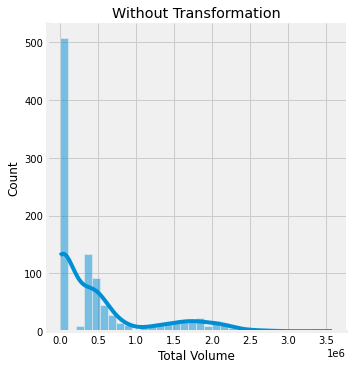

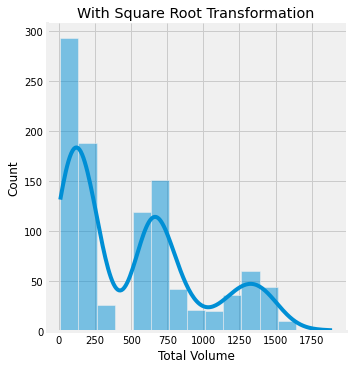

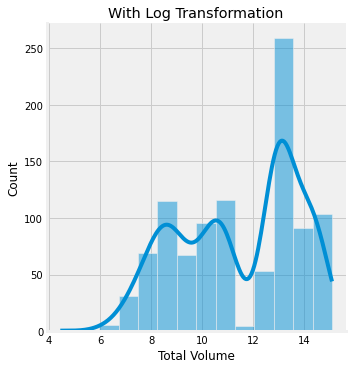

In [14]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(df1['Total Volume'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(df1['Total Volume']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(df1['Total Volume']), kde = True).set(title='With Log Transformation')

In [16]:
#perform log transformation
df1['Total Volume_log'] = np.log(df1['Total Volume'])

In [17]:
bartlett(df1["Total Volume_log"], df1["regionR"])

BartlettResult(statistic=943.6595048700832, pvalue=3.169680667914177e-207)

## explain your results
#### With the normal and squareroot transformations, there wasn't a normal distribution of the total volume, the best fit transformation was with log.
#### We are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05. 
### With this test the pvalue is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance. However, we know that each city doesn't impact the other cities chosen. So we will move ahead knowing we don't have cities close to eachother.

In [18]:
f_oneway(
    df["Total Volume"][df["region"]=='MiamiFtLauderdale'],
    df["Total Volume"][df["region"]=='Plains'],
    df["Total Volume"][df["region"]=='Philadelphia']
)

F_onewayResult(statistic=156.28438428078067, pvalue=7.225167625349979e-60)

## explain your results
### Here again our pvalue is less than .05, there is a significant difference between these three categories or regions/cities.

In [19]:
postHocResults = MultiComparison(df1["Total Volume_log"], df1["region"]).tukeyhsd()
print(postHocResults)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
      group1         group2    meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------
MiamiFtLauderdale Philadelphia   0.4573 0.0169 0.0664 0.8482   True
MiamiFtLauderdale       Plains   1.9345    0.0 1.5436 2.3254   True
     Philadelphia       Plains   1.4772    0.0 1.0863 1.8681   True
-------------------------------------------------------------------


## explain your results
### This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), and whether or not you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups.

### So, there is a significant difference between the consumption of Avocados between all 3 of the Cities/Regions.

### Let's move on to step 7 to find out what the differences are:

## Step Seven
---

In [20]:
df2 = df1[['region', 'Total Volume']]

df2.groupby('region').mean()

,Total Volume
region,
MiamiFtLauderdale,288974.035592
Philadelphia,212540.823018
Plains,920676.121627


#explain your results
### There is a significant difference in the 3 cities/regions we've chosen. 
### The Plains consume the most avocados, more than 3 times what Philadephia and MiamiFtLauderdale consume. 
### MiamiFtLauderdale and Philadelphia do consume about the same amount of Avocados, but you can see MiamiFtLauderdale consumes about 1/6 more than Philadelphia.

# Let's look at How the 3 cities Average Price of Avocados compare to eachother.

### Test for assumptions
#### -Normality
#### -Homogeneity of Variance

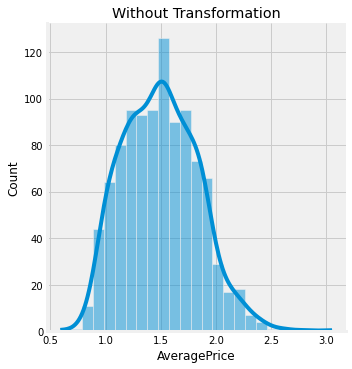

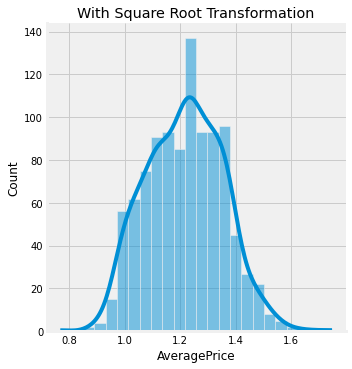

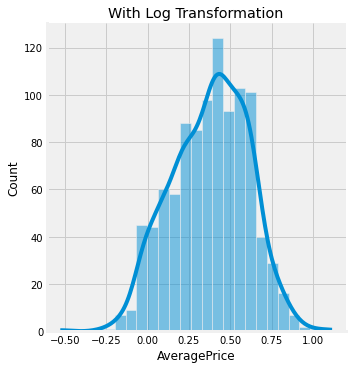

In [21]:
#Without Transformation
sns.displot(df1['AveragePrice'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(df1['AveragePrice']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(df1['AveragePrice']), kde = True).set(title='With Log Transformation')

In [22]:
#perform Square Root Transformation
df1['AveragePrice_sqrt'] = np.sqrt(df1['AveragePrice'])

In [23]:
bartlett(df1["AveragePrice_sqrt"], df1["regionR"])

BartlettResult(statistic=2241.4760176039435, pvalue=0.0)

## explain your results
### The square root transformation was our best option for testing normality
### The bartlett test shows a pvalue of 0.0 meaning it is < .05 there is a significant difference in the average price of Avocados for each of the 3 regions/cities. Let's keep looking to find out how much different.

In [24]:
f_oneway(
    df["AveragePrice"][df["region"]=='MiamiFtLauderdale'],
    df["AveragePrice"][df["region"]=='Plains'],
    df["AveragePrice"][df["region"]=='Philadelphia']
)

F_onewayResult(statistic=41.84222514385266, pvalue=3.476525251220118e-18)

### Here again our pvalue is less than .05, this confirms there is a significant difference in the average price between these three regions/cities.

In [25]:
postHocResults = MultiComparison(df1["AveragePrice_sqrt"], df1["region"]).tukeyhsd()
print(postHocResults)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
      group1         group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
MiamiFtLauderdale Philadelphia    0.084    0.0  0.0599  0.1081   True
MiamiFtLauderdale       Plains   0.0032 0.9469 -0.0209  0.0273  False
     Philadelphia       Plains  -0.0808    0.0 -0.1049 -0.0567   True
---------------------------------------------------------------------


### This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), and whether or not you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups.
### The postHocResults output tells us we can rejct the null hypothesis with Philadephia in comparison to both of the other regions. However, for MiamiFtLauderdal in comparison with the Plains we will acept the null hypothesis. 
### Let's move on to find out where the differences are:

In [26]:
df3 = df1[['region', 'AveragePrice']]

df3.groupby('region').mean()

,AveragePrice
region,
MiamiFtLauderdale,1.428491
Philadelphia,1.632130
Plains,1.436509


### This gives us a much clearer look at the Average price per region. We can see that there is only a penny difference between MiamiFtLauderdale and the Plains; which is not significant at all. Whereas Philadelphia is 20 cents more than the Plains and 21 cents more than MiamiFtLauderdale. which would be more significant in comparison.

## That was fun! Now let's see which size bag of Avocados on average sells the most during each season.
#### We will use a MANOVA (Multivariate Analysis of Variance) test, which will allow us to determine if there is a significant interaction between the two factors (bag size and season). 
#### The independent variable will be season, this a categorical variable and has 4 levels. The three dependent variables will be the bag size of avocados, these variables are continuous.

## Data Wrangling
#### First, we will need to reframe seasons from numrical to categorical. So some wrangling is required to test for assumptions. 
#### Next, In order to test for multivariate normality, we will need to create a dataset containing only the three dependent variables that is in a matrix format, and we will need to ensure that they are numeric. 

#### needed to add these two libraries for analysis. they are added with other libraries at the begining of notebook: 
##### import pingouin as pg
##### from scipy.stats import shapiro

In [30]:
# create a dictionary to map numerical seasons to categorical seasons
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

# replace numerical seasons with categorical seasons using the dictionary
df1['SeasonR'] = df1['Season'].replace(season_dict)

In [31]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,typeR,regionR,Total Volume_log,AveragePrice_sqrt,SeasonR
1248,2015-12-27,0.99,545064.74,387953.32,44652.25,54.44,112404.73,53606.13,58798.60,0.00,conventional,2015,MiamiFtLauderdale,1,0,0,13.208660,0.994987,Winter
1249,2015-12-20,1.21,350533.71,238269.18,32386.55,92.33,79785.65,50138.45,29624.11,23.09,conventional,2015,MiamiFtLauderdale,1,0,0,12.767212,1.100000,Winter
1250,2015-12-13,0.97,529317.46,387065.94,49363.20,85.47,92802.85,38463.54,54339.31,0.00,conventional,2015,MiamiFtLauderdale,1,0,0,13.179344,0.984886,Winter
1251,2015-12-06,1.25,340513.61,247061.97,34861.19,83.27,58507.18,25297.27,33209.91,0.00,conventional,2015,MiamiFtLauderdale,1,0,0,12.738210,1.118034,Winter
1252,2015-11-29,0.98,470218.14,349408.27,42435.51,70.13,78304.23,27392.48,50911.75,0.00,conventional,2015,MiamiFtLauderdale,4,0,0,13.060952,0.989949,Fall


In [32]:
df_Q3 = df1[['Small Bags', 'Large Bags', 'XLarge Bags', 'SeasonR']]

In [33]:
df_Q3.head()

,Small Bags,Large Bags,XLarge Bags,SeasonR
1248,53606.13,58798.60,0.00,Winter
1249,50138.45,29624.11,23.09,Winter
1250,38463.54,54339.31,0.00,Winter
1251,25297.27,33209.91,0.00,Winter
1252,27392.48,50911.75,0.00,Fall


In [34]:
print(df_Q3.dtypes)

Small Bags     float64
Large Bags     float64
XLarge Bags    float64
SeasonR         object
dtype: object


### Looks like we've got numerical data in small, large, and xlarge bags columns that include numbers with a fractional part. And the seasonR colums has categorical data. 
# Subsetting
### Next, we'll keep only the three dependent variables, small bags, large bags and xlarge bags.

In [35]:
dep_vars = ['Small Bags', 'Large Bags', 'XLarge Bags']
dep_var_subset = df_Q3[dep_vars]
print(dep_var_subset.head())

      Small Bags  Large Bags  XLarge Bags
1248    53606.13    58798.60         0.00
1249    50138.45    29624.11        23.09
1250    38463.54    54339.31         0.00
1251    25297.27    33209.91         0.00
1252    27392.48    50911.75         0.00


In [37]:
#limit the number of rows
limited_df = df_Q3.iloc[0:5000]

### convert dataframe into a matrix

In [38]:
matrix = dep_var_subset.values

## We are now ready to perform the assumptions test for multivariate normality
#### Sample size- the first assumption of Manovas is sample size. The rule of thumb is that you must have at least 20 cases per independent variable, and that there must be more cases then dependent variables in every cell.
#### Happily, all three of these are fulfilled with a data set of 18249 per row.

In [39]:
# perform Shapiro-Wilk test
stat, p = shapiro(dep_var_subset)

In [40]:
if p > 0.05:
    print("The data is multivariate normal (fail to reject HO)")
else:
    print("The data is not multivariate normal (reject HO)")
print("Test statistic:", stat)
print("p-value:", p)

The data is not multivariate normal (reject HO)
Test statistic: 0.4731401801109314
p-value: 0.0


#### You have violated the assumption of multivariate normality if the p value is significant at p < .05, so unfortunately, these data do not meet the assumption for MANOVAs. However, for learning purposes, we will continue with caution.

## Homogeneity of Variance

In [ ]:
# run Levene's test
statistic, pvalue = levene(sample1, sample2)

In [47]:
df1.to_csv("avocados_seasons2.csv")

## At this point so is where I decided it was better to be running this through R and needed the added columns that included SeasonR. that explains the code above. please see R file ran in jupyter notebook for final analysis and code work :) 